# 차원축소 Assignment2

## MNIST data에 적용을 해보기

mnist-original.mat 파일과 같은 위치에서 주피터 노트북을 열어주세요

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import pandas as pd
import csv
from numpy import linalg as LA
from sklearn.manifold import TSNE
import seaborn as sns

In [2]:
import numpy as np
import numpy.linalg as lin
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_openml
from scipy import io
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D

In [3]:
mnist = io.loadmat('mnist-original.mat') #mnist 손글씨 데이터를 불러옵니다
X = mnist['data'].T
y = mnist['label'].T

# 데이터 정보!
- 7만개의 작은 숫자 이미지
- 행 열이 반대로 되어있음 -> 전치
- grayscale 28x28 pixel = 784 feature
- 각 picel은 0~255의 값
- label = 1~10 label이 총 10개인거에 주목하자

In [4]:
print(X.shape, y.shape)

(70000, 784) (70000, 1)


In [5]:
# data를 각 픽셀에 이름붙여 표현
feat_cols = [ 'pixel'+str(i) for i in range(X.shape[1]) ]
df = pd.DataFrame(X,columns=feat_cols)
df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# df에 라벨 y를 붙여서 데이터프레임 생성
df['y'] = y
print('Size of the dataframe: {}'.format(df.shape))

Size of the dataframe: (70000, 785)


In [7]:
df

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9.0


<Figure size 432x288 with 0 Axes>

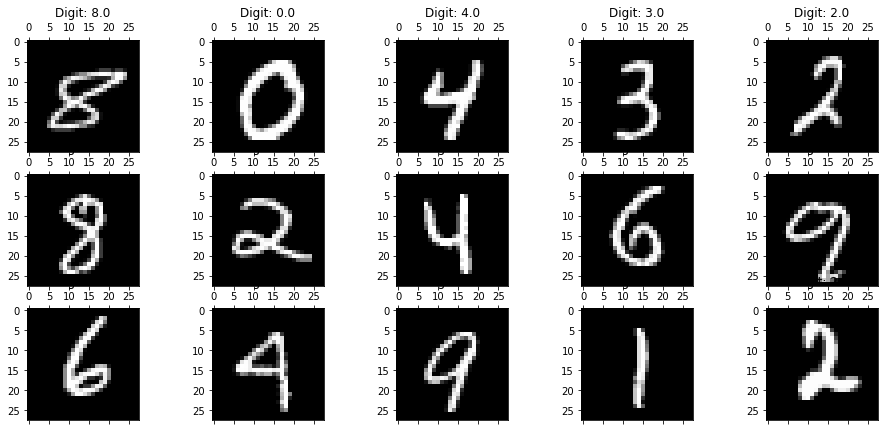

In [8]:
# 데이터 형태 시각화

import matplotlib.pyplot as plt

rndperm = np.random.permutation(df.shape[0])

# Plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,15):
    ax = fig.add_subplot(3,5,i+1, title="Digit: {}".format(str(df.loc[rndperm[i],'y'])) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()

### 1) train_test_split을 통해 데이터를 0.8 0.2의 비율로 분할 해 주세요

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop('y', axis=1), df['y'], stratify=df['y'])

In [10]:
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
standard_scaler.fit(X_train)
X_scaled_train = standard_scaler.transform(X_train)
X_scaled_test  = standard_scaler.transform(X_test)

### 여기서부터는 원본데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교해주세요

### 2) 차원축소 기법(PCA와 LDA)을 이용하여 mnist data를 축소시켜주세요

pca를 이용할 때는, 주성분 개수를 정하는 과정에 대해 잘 서술해주시면 좋겠죠!<br>
강의에서 배웠던 3가지 중 어떤 걸 고려해서 갯수를 정했는지요!!!!<br>
scree plot같은거는 직접 그려서 확인해주면 좋겠죠???

In [11]:
from sklearn.decomposition import PCA
# The amount of variance that each PCA explains is 
pca = PCA()



In [12]:
#Using Sklearn (As Performed Above)

X_r = pca.fit(X_train).transform(X_train)
print('\nEigenvalues \n%s' %pca.explained_variance_)
print('Eigenvectors \n%s' %pca.components_)


Eigenvalues 
[3.32801750e+05 2.45970422e+05 2.11769621e+05 1.85206585e+05
 1.67315034e+05 1.48251910e+05 1.12569264e+05 9.95346150e+04
 9.47170545e+04 8.01091172e+04 7.25551779e+04 7.04721523e+04
 5.86049910e+04 5.80415728e+04 5.43748249e+04 5.11039314e+04
 4.52710313e+04 4.36293410e+04 4.04185327e+04 3.95496243e+04
 3.64943104e+04 3.45972875e+04 3.28534163e+04 3.10329895e+04
 3.02167244e+04 2.86114595e+04 2.77448192e+04 2.68948432e+04
 2.54338264e+04 2.36102818e+04 2.24820314e+04 2.22398560e+04
 2.06521581e+04 2.00687143e+04 1.93941280e+04 1.85522233e+04
 1.73863430e+04 1.67183644e+04 1.64387302e+04 1.60294768e+04
 1.56611417e+04 1.52585741e+04 1.43035901e+04 1.36502332e+04
 1.31643971e+04 1.28296752e+04 1.24536388e+04 1.19513663e+04
 1.15788038e+04 1.09330340e+04 1.08523270e+04 1.05899059e+04
 1.01765008e+04 9.89478122e+03 9.68495835e+03 9.25729225e+03
 9.18800597e+03 8.80586632e+03 8.66203965e+03 8.39261009e+03
 8.20655303e+03 8.11882387e+03 7.89033264e+03 7.58101609e+03
 7.3102098

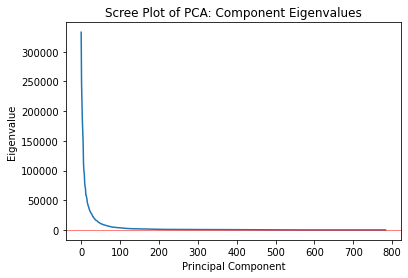

In [13]:
# scree plot으로 최적의 principle component를 찾기 
def scree_plot():
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(pca.explained_variance_)
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Principal Component')
    plt.ylabel('Eigenvalue')
    plt.axhline(y=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Scree Plot of PCA: Component Eigenvalues')
    show()

scree_plot()

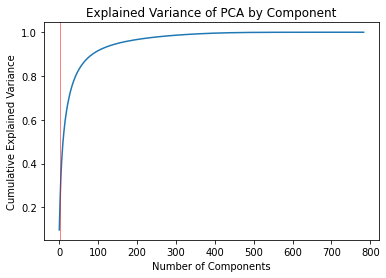

In [14]:
#Var_explained 모델로 variance 를 그려봐야한다. 
def var_explained():
    import numpy as np
    from matplotlib.pyplot import figure, show
    from matplotlib.ticker import MaxNLocator

    ax = figure().gca()
    ax.plot(np.cumsum(pca.explained_variance_ratio_))
    ax.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.xlabel('Number of Components')
    plt.ylabel('Cumulative Explained Variance')
    plt.axvline(x=1, linewidth=1, color='r', alpha=0.5)
    plt.title('Explained Variance of PCA by Component')
    show()

var_explained()

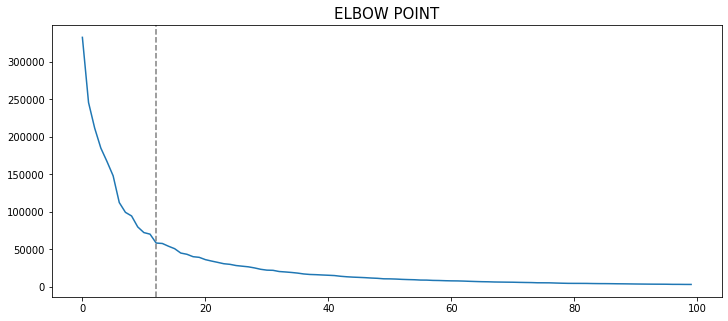

In [15]:
# elbow 포인트 지점을 확인하기 위해 0~100 구간을 세밀하게 살펴보도록 한다.
# 확인 결과, 상위 13개의 eigen value를 제외한 나머지 eigen value 사이에는 그다지 큰 차이가 없는 것으로 보인다.

plt.figure(figsize=(12, 5))
plt.plot(range(0, 100), np.sort(pca.explained_variance_)[::-1][0:100])

plt.title('ELBOW POINT', size=15)
plt.axvline(12, ls='--', color='grey')

plt.show()

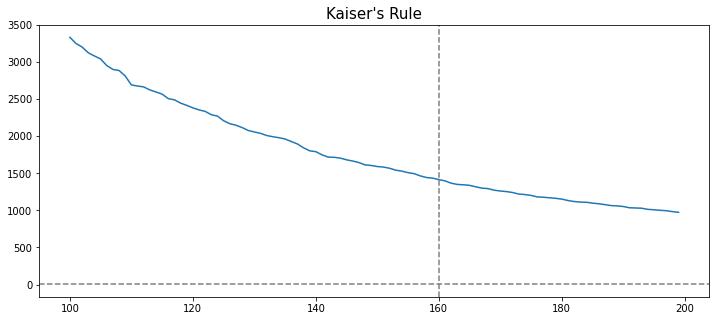

In [16]:
plt.figure(figsize=(12, 5))
plt.plot(range(100, 200), np.sort(pca.explained_variance_)[::-1][100:200])

plt.title("Kaiser's Rule", size=15)
plt.axhline(1, ls='--', color='grey')
plt.axvline(160, ls='--', color='grey')

plt.show()

In [17]:
pca = PCA(n_components=160)
pca.fit(X_scaled_train)
X_PCA_train = pca.transform(X_scaled_train)
X_PCA_test  = pca.transform(X_scaled_test)

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
import time
import warnings
warnings.filterwarnings('ignore')

In [20]:
rf = RandomForestClassifier()

In [21]:
from sklearn.metrics import *

In [22]:
start = time.time()

rf.fit(X_PCA_train , y_train)
end  = time.time()
pred = rf.predict(X_PCA_test)

In [23]:
print(f'time > {end-start}')

time > 66.11772632598877


In [24]:
# random forest 스코어
print(accuracy_score(pred, y_test))

0.9430285714285714


In [25]:
#decision Tree
from sklearn.tree import DecisionTreeClassifier

In [26]:
dt_clf = DecisionTreeClassifier()
start = time.time()
dt_clf.fit(X_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 15.461451053619385


In [27]:
pred = dt_clf.predict(X_test)
print(accuracy_score(pred, y_test))

0.8682285714285715


In [28]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [29]:
# lda 먼저 initialize 하기 

lda = LinearDiscriminantAnalysis()

In [30]:
lda.fit_transform(X_scaled_train,y_train)
#pca.fit(X_scaled_train)
X_LDA_train = pca.transform(X_scaled_train)
X_LDA_test  = pca.transform(X_scaled_test)

In [31]:
# rf
start = time.time()
rf.fit(X_LDA_train, y_train)
end  = time.time()
pred = rf.predict(X_LDA_test)

In [32]:
# lda 스코어
print(accuracy_score(pred, y_test))

0.9435428571428571


In [33]:
start = time.time()
dt_clf.fit(X_LDA_train, y_train)
end  = time.time()
print(f'time > {end-start}')

time > 16.888507843017578


In [34]:
# lda 스코어
print(accuracy_score(pred, y_test))

0.9435428571428571


### 3) 지금까지 배웠던 머신러닝 기법을 이용하여 학습해주세요 (2개이상 사용)

###  이때 time stamp를 찍어서 training 시간을 비교하고, test accuracy도 비교해주세요
#### (원본 데이터 & PCA 축소 데이터 & LDA 축소 데이터 비교)

특정한 틀 없이 자유롭게 해주시면 됩니다!